In [6]:
################################################ nastavitve ###########################################################

# Nastavitve programa (potem vse ostalo sam izračuna)
# Tukaj nastavimo število točk in točke (če pustimo prazno računalnik samodejno izbere 2n točk) 

stevilo_tock = 12
#zacetne_tocke = [[0,5],[-4,3],[-1,-6],[7,2],[4,-4],[7,0],[-4,-1],[0,0]]
zacetne_tocke = []

# Način programa ("max": makismiziramo dolžine povezav ali "min": minimiziramo dolžine povezav)

nacin = "max"

######################################## tukaj naprej ne spreminjaj ###################################################


if stevilo_tock <= 0:
    print("Napaka: število točk mora biti pozitivno")
elif stevilo_tock % 2 != 0:
    print("Napaka: izbrati je treba sodo število točk")
elif len(zacetne_tocke) != 0 and len(zacetne_tocke) != stevilo_tock:
    print("Napaka: premalo ali preveč točk")
else:
    print("Nastavitve uspešno nastavljene")

import random

# Funkcija, ki bo naključno generirala n točk oblike (a.bc, d.ef) v prostoru [0,9.99] x [0,9.99]
stevila = [0,1,2,3,4,5,6,7,8,9]
def generiraj_n_tock(n):
    tocke = []
    i = n
    while i != 0:
        a = random.choice(stevila)
        b = random.choice(stevila)
        c = random.choice(stevila)
        d = random.choice(stevila)
        e = random.choice(stevila)
        f = random.choice(stevila)
        stevilo1 = a + b * 1/10 + c * 1/100
        stevilo2 = d + e * 1/10 + f * 1/100
        tocka = [stevilo1, stevilo2]
        if tocka not in tocke:
            tocke.append(tocka)
            i = i - 1
    return tocke

Nastavitve uspešno nastavljene


Izbrane točke:
[3.25, 5.96]
[8.82, 5.89]
[4.79, 1.53]
[1.39, 0.68]
[4.94, 4.57]
[5.53, 0.54]
[1.05, 5.15]
[8.33, 1.9]
[2.17, 6.68]
[8.33, 2.69]
[1.86, 0.86]
[7.41, 0.43]


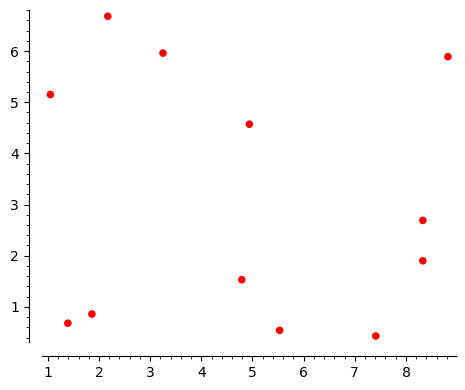

In [7]:
# Generator točk

# Pozor: če želimo uporabiti iste točke in spreminjamo samo način, moramo ta korak izpustiti. Sicer po program izbral novih n naključnih točk

if len(zacetne_tocke) == 0:
    seznam_tock = generiraj_n_tock(stevilo_tock)
else: seznam_tock = zacetne_tocke

print("Izbrane točke:")
zacasni_seznam = seznam_tock
for i in range(len(seznam_tock)):
    zacasni_seznam[i][0] = float(seznam_tock[i][0])
    zacasni_seznam[i][1] = float(seznam_tock[i][1])
    print(zacasni_seznam[i])

graf_tock = list_plot(seznam_tock, color='red', pointsize=30)
show(graf_tock, aspect_ratio=1)

In [8]:
# Razdalje med točkami

# Definiramo število točk
st_tock = len(seznam_tock)

# Naredimo matriko razdalj med posameznimi točkami. Če sta točki enaki je razdalja 0
def razdalja(tocka1, tocka2): return sqrt((tocka1[0]-tocka2[0])^2 + (tocka1[1]-tocka2[1])^2)

razdalje = []
for i in range(st_tock):
    a = []
    for j in range(st_tock):
        a.append(razdalja(seznam_tock[i], seznam_tock[j]))
    razdalje.append(a)

print("Razdalje uspešno izračunane")

Razdalje uspešno izračunane


In [9]:
# Presečišča daljic

# Funkcija pove, ali se daljici (t1,t2) in (t3,t4) sekata
def alisesekata(t1, t2, t3, t4):
    if (t1 == t3 and t2 == t4) or (t1 == t4 and t2 == t3):
        return False
    if (t1 == t2 or t1 == t3 or t1 == t4 or t2 == t3 or t2 == t4 or t3 == t4):
        return True
    if t1[0] == t2[0]:
        if t3[0] == t4[0]:
            if (t1[0] == t3[0]) and ((max(t1[1], t2[1]) < min(t3[1], t4[1])) or ((max(t3[1], t4[1]) < min(t1[1], t2[1])))):
                return False
            else: return True
        else:
            k2 = (t3[1] - t4[1]) / (t3[0] - t4[0])
            n2 = 1 / 2 * (t3[1] + t4[1] - k2 * (t3[0] + t4[0]))
            y = t1[0] * k2 + n2
            if (y >= min(t3[1], t4[1]) and y <= max(t3[1], t4[1])):
                return True
            else:
                return False
    else: k1 = (t1[1] - t2[1]) / (t1[0] - t2[0])
    if t3[0] == t4[0]:
        n1 = 1 / 2 * (t1[1] + t2[1] - k1 * (t1[0] + t2[0]))
        y = t3[0] * k1 + n1
        if (y >= min(t1[1], t2[1]) and y <= max(t1[1], t2[1])):
            return True
        else: return False
    else: k2 = (t3[1] - t4[1]) / (t3[0] - t4[0])
    n1 = 1 / 2 * (t1[1] + t2[1] - k1 * (t1[0] + t2[0]))
    n2 = 1 / 2 * (t3[1] + t4[1] - k2 * (t3[0] + t4[0]))
    if (k1 == k2):
        if (n1 == n2):
            if ((max(t1[0], t2[0]) < min[t3[0],t4[0]]) or (min(t1[0], t2[0]) > max[t3[0],t4[0]])):
                return False
            else: return True
        else: return False
    x = (n2 - n1) / (k1 - k2)
    y = k1 * x + n1
    if (x >= min(t1[0], t2[0]) and x <= max(t1[0], t2[0])) and (x >= min(t3[0], t4[0]) and x <= max(t3[0], t4[0])) and (y >= min(t1[1], t2[1]) and y <= max(t1[1], t2[1])) and (y >= min(t3[1], t4[1]) and y <= max(t3[1], t4[1])):
            return True
    return False

presecisca = []
for i in range(st_tock):
    for j in range(st_tock):
        a = []
        for k in range(st_tock):
            for l in range(st_tock):
                if alisesekata(seznam_tock[i], seznam_tock[j], seznam_tock[k], seznam_tock[l]):
                    a.append(1)
                else: a.append(0)
        presecisca.append(a)

print("Matrika presečišč uspešno izračunana")

Matrika presečišč uspešno izračunana


In [10]:
# Linearni program

# Ustvarimo linerani program

p = MixedIntegerLinearProgram(maximization=True)
x = p.new_variable(binary=True)

# Nastavimo cilj programa (torej minimizacijo dolžine povezav)
if nacin == "max":
    cilj = 2
if nacin == "min":
    cilj = 1
p.set_objective((-1)^(cilj) * 1/2 * sum(x[i*st_tock + j] * razdalje[i][j] for i in range(st_tock) for j in range(st_tock)))

# Pogoji za pravilno rešitev
    # 1.: iz vsake točke vodi samo ena povezava
for i in range(st_tock):
    p.add_constraint(sum(x[i*st_tock + j] for j in range(st_tock)) == 1)

    # 2.: v vsako točko pride samo ena povezava
for j in range(st_tock):
    p.add_constraint(sum(x[i*st_tock + j] for i in range(st_tock)) == 1)

    # 3.: če je uporabljena povezava ij mora biti uporabljena tudi ji
for i in range(st_tock):
    for j in range(st_tock):
        p.add_constraint(x[i*st_tock + j] == x[j*st_tock + i])

    # 4.: povezave se ne smejo sekati
for i in range(st_tock):
    for j in range(st_tock):
        p.add_constraint(st_tock * x[i*st_tock + j] + sum(x[st_tock * k + l] * presecisca[st_tock * i + j][st_tock * k + l] for k in range(st_tock) for l in range(st_tock)) <= st_tock)

vrednost = p.solve()
if nacin == "min":
    vrednost = - vrednost



resitev = p.get_values(x)

print("Linearni program uspešno rešen")
print("Vrednost rešitve: " + str(round(vrednost,2)))

Linearni program uspešno rešen
Vrednost rešitve: 32.31


Prikaz uporabljenih povezav za optimalno rešitev:


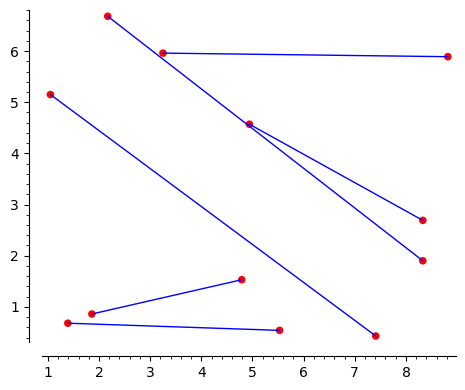

In [11]:
uporabljene_povezave = []

for i in range(st_tock):
    for j in range(st_tock):
        if resitev[st_tock * i + j] == 1.0:
            if [j,i] not in uporabljene_povezave:
                uporabljene_povezave.append([i,j])

seznam_daljic = []

for povezava in uporabljene_povezave:
    seznam_daljic.append(line([seznam_tock[povezava[0]], seznam_tock[povezava[1]]]))

print("Prikaz uporabljenih povezav za optimalno rešitev:")
show(graf_tock + sum(seznam_daljic[i] for i in range(st_tock / 2)), aspect_ratio=1)